#### [ 지도학습 - 회귀 ]
- 회귀(Regression) : 수치값을 예측하는 학습
    * 예 : 거리, 시간, 무게, 집가격 등등 ...

- 주제 : 생선 길이에 따른 무게를 예측하는 모델
- 방법 : 최근접이웃 알고리즘

[1] 모듈 로딩 및 데이터 준비 <hr>

In [1]:
## ==========================================
## [1-1] 모듈 로딩
## ==========================================
import pandas as pd
import numpy as np

## 시각화
import matplotlib.pyplot as plt
import koreanize_matplotlib

## ML 관련
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

## Cow 활성화 : 복사와 공유 자동 설정 기능 활성화
pd.options.mode.copy_on_write = True

# 판다스/넘파이에 지수표기법(과학적표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=6, suppress=True)



In [2]:
## =======================================
## [1-2] 데이터 준비 및 확인
## =======================================
## 데이터 준비
data_file = '../Data/fish_train_10500.csv'

## Bream, Smelt 생선 데이터 추출
fishDF = pd.read_csv(data_file)

(fishDF.Species == 'Bream') | (fishDF.Species == 'Smelt')

dataDF = fishDF[fishDF.Species.isin(['Bream', 'Smelt'])]
dataDF = dataDF[['Weight', 'Length','Species']]
dataDF

,Weight,Length,Species
0,487.42334,32.42375,Bream
1,990.89654,41.36527,Bream
2,627.08172,33.44470,Bream
3,749.38272,35.68641,Bream
4,615.62195,33.52775,Bream
...,...,...,...
10495,7.84624,11.21824,Smelt
10496,14.77972,13.10661,Smelt
10497,13.13453,12.38393,Smelt
10498,8.09812,10.94337,Smelt


        Weight  Length
Weight 1.00000 0.96938
Length 0.96938 1.00000


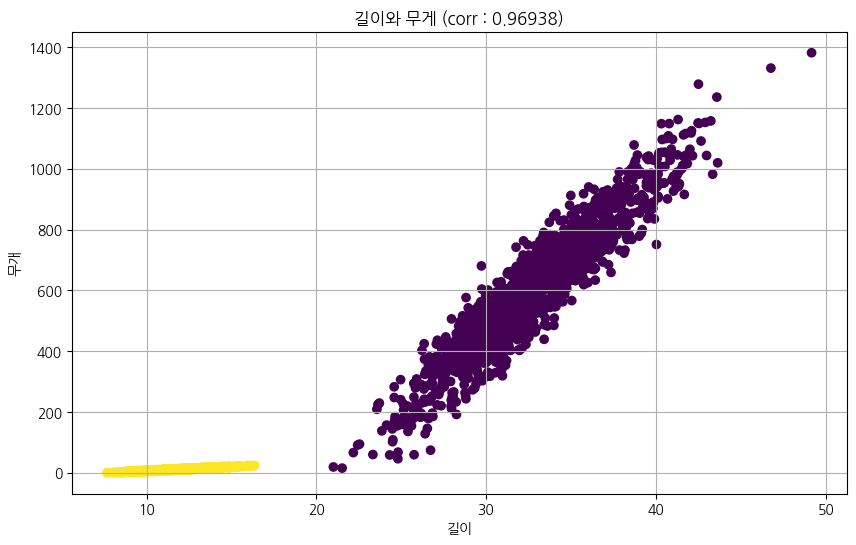

In [3]:
## 길이와 무게, 품종 관계 시각화
dataDF['Species'] = dataDF['Species'].astype('category')
corr_ = dataDF.corr(numeric_only=True)
print(corr_)

plt.figure(figsize=(10,6))
plt.scatter(dataDF.Length, dataDF.Weight, c = dataDF.Species.cat.codes)
plt.title(f"길이와 무게 (corr : {corr_['Weight']['Length']:.5f})")
plt.xlabel('길이')
plt.ylabel('무개')
plt.grid()
plt.show()

[2] 피쳐와 타겟/학습용과 테스트 분리 <hr>

In [4]:
featureDF = dataDF[dataDF.columns[1:-1]] ## 길이
# print(featureDF.shape)
targetSR = dataDF[dataDF.columns[0]]     ## 무개
# print(targetSR.shape)

x_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    # stratify=targetSR ## 분류에만 사용, 회귀는 X
                                                    )

print(f'[TRAIN] x_train:{x_train.shape},  y_train:{y_train.shape}')
print(f'[TEST] x_test:{x_test.shape},  y_test:{y_test.shape}')

[TRAIN] x_train:(2400, 1),  y_train:(2400,)
[TEST] x_test:(600, 1),  y_test:(600,)


[3] 학습 진행 <hr>

In [5]:
## 모델 인스턴스 생성
dtModel = DecisionTreeRegressor(random_state=10)
dtModel

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,10
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [6]:
## 학습진행 => 학습용 데이터셋만 사용
dtModel.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,10
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [34]:
## 학습 후 학습용데이터셋 기반 모델 파라미터 설정
## - 모델 파라미터 : 파라미터이름_
print('n_features_in_   :', dtModel.n_features_in_)
print('n_feature_names_in   :', dtModel.feature_names_in_)
print('max_features_   :', dtModel.max_features_)
print('feature_importances_   :', dtModel.feature_importances_)
print('.get_depth()   :', dtModel.get_depth())

print('tree_.children_left   :', dtModel.tree_.children_left)
print('tree_.children_right   :', dtModel.tree_.children_right)




n_features_in_   : 1
n_feature_names_in   : ['Length']
max_features_   : 1
feature_importances_   : [1.]
.get_depth()   : 31
tree_.children_left   : [ 1  2  3 ... -1 -1 -1]
tree_.children_right   : [2588 2437 2430 ...   -1   -1   -1]


[4] 성능평가 <hr>

In [9]:
## 훈련용 성능평가 & 테스트용 성능평가 비교
train_score = dtModel.score(x_train, y_train)
test_score  = dtModel.score(x_test, y_test)

print(f'train_score : {train_score}')
print(f'test_score  : {test_score}')

train_score : 0.9999104807888479
test_score  : 0.9572771572467333


[5] 예측 : 새로운 데이터 사용 <hr>
- predict(2D_새로운 피쳐) ==> 예측 무게 값
- n_neighbors의 무게를 추출 => 평균한 값과 예측무게 값이 같은지 체크

In [33]:
newDF = pd.DataFrame([[20]], columns=dataDF.columns[1:-1])
display(newDF)

pre_weights = dtModel.predict(newDF)
print(pre_weights.tolist())


,Length
0,20


[18.924735229509068]


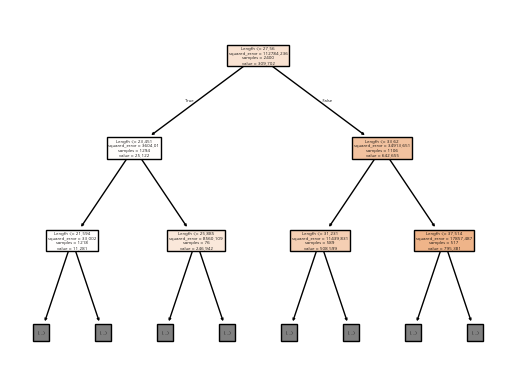

In [31]:
import graphviz
from sklearn.tree import plot_tree
plot_tree(dtModel, max_depth= 2, 
          feature_names=x_train.columns[0:1],
          class_names=[y_train.name],
          filled=True )
plt.show()

In [35]:
pre_weights = dtModel.predict(newDF)
print('예측 무게 :',(pre_weights.tolist()))

## 값을 예측한 경로
dtModel.decision_path(newDF).todense().tolist()

예측 무게 : [18.924735229509068]


[[1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
